In [44]:
from src import analysis_utils as utils
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns; sns.set()
import pandas as pd
from scipy.stats import poisson
%matplotlib inline 
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Experiment 21: What is the effect of crowding on mobility/caging of EfTu-tRNA? Or, at what volume fraction are at a fixed volume. Volume fraction = 13%, 23, 33, 43, 53, 63%. To make even across all crowding levels, only will be tracking 47 tRNA and 7 ribosomes in particular. Crowding is increased by increasing number of all particles involved in translation equally (to maintain accurate polydisperity) while keeping voxel dimensions fixed (to control for volume).

In [63]:
expt21_df=utils.readSimData("data/expt21_47tRNAEfTu_7ribosome_8tRNASynth_0aa_85nmSidelength_20180501.xls")
expt21_df_incorr = utils.countIncorrectRibosomeCollisions(expt21_df,np.arange(8,12),np.arange(1,2));

expt22_df=utils.readSimData("data/expt22_84tRNAEfTu_13ribosome_15tRNASynth_0aa_85nmSidelength_20180501.xls")
expt22_df_incorr = utils.countIncorrectRibosomeCollisions(expt22_df,np.arange(1,5),np.arange(85,86));
expt22_df_incorr_47= utils.countIncorrectRibosomeCollisions(expt22_df,np.arange(1,5),np.arange(85,86), tRNAInclusionList=np.arange(1,47));

expt23_df=utils.readSimData("data/expt23_121tRNAEfTu_19ribosome_22tRNASynth_0aa_85nmSidelength_20180501.xls")
expt23_df_incorr = utils.countIncorrectRibosomeCollisions(expt23_df,np.arange(1,5),np.arange(122,123));
expt23_df_incorr_47 = utils.countIncorrectRibosomeCollisions(expt23_df,np.arange(1,5),np.arange(122,123), tRNAInclusionList=np.arange(1,47));

expt24_df=utils.readSimData("data/expt24_158tRNAEfTu_24ribosome_28tRNASynth_0aa_85nmSidelength_20180501.xls")
expt24_df_incorr = utils.countIncorrectRibosomeCollisions(expt24_df,np.arange(1,5),np.arange(159,160));
expt24_df_incorr_47 = utils.countIncorrectRibosomeCollisions(expt24_df,np.arange(1,5),np.arange(159,160), tRNAInclusionList=np.arange(1,47));

expt25_df=utils.readSimData("data/expt25_195tRNAEfTu_30ribosome_34tRNASynth_0aa_85nmSidelength_20180501.xls")
expt25_df_incorr = utils.countIncorrectRibosomeCollisions(expt25_df,np.arange(1,5),np.arange(196,197));
expt25_df_incorr_47 = utils.countIncorrectRibosomeCollisions(expt25_df,np.arange(1,5),np.arange(196,197), tRNAInclusionList=np.arange(1,47));

Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)


21 mean47 48.5662733025
22 mean47 42.8858600583
23 mean47 50.6082768999
24 mean47 50.0314347513
25 mean47 45.7029090909


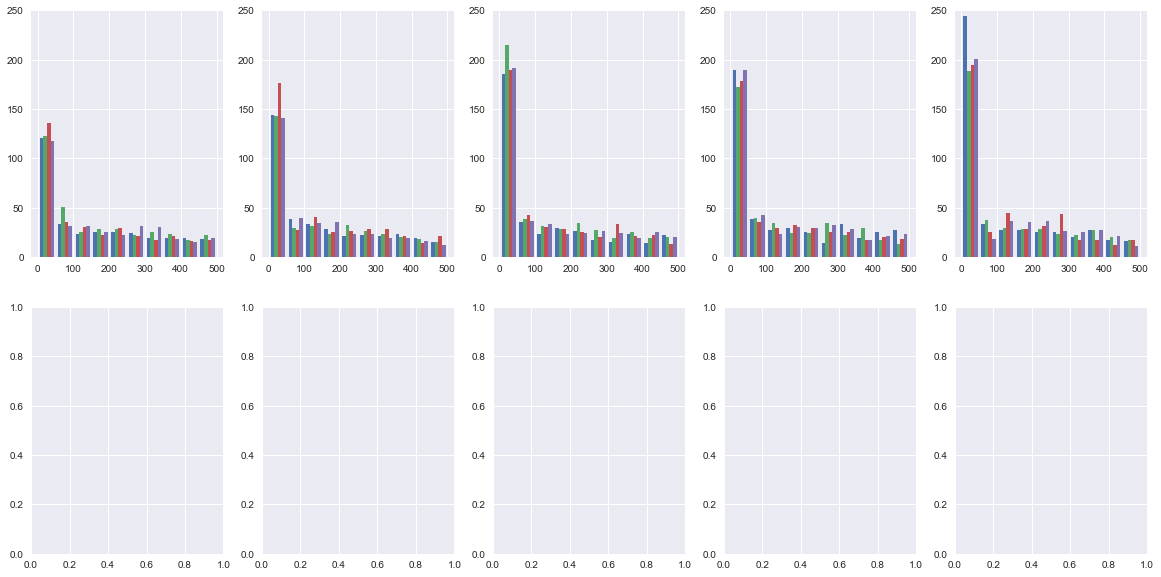

In [116]:
df_list = [expt21_df_incorr,expt22_df_incorr,expt23_df_incorr,expt24_df_incorr, expt25_df_incorr]
df_list_47 = [expt21_df_incorr,expt22_df_incorr_47,expt23_df_incorr_47,expt24_df_incorr_47, expt25_df_incorr_47]
df_name = ["21","22","23","24","25"]
df_averages=list();
df_averages47=list();

fig,ax=plt.subplots(2,5,figsize=(20,10))
for i,df_i in enumerate(df_list_47):
    ax[0,i].hist(df_i[0],bins=10,range=(1,500))
    ax[0,i].set_ylim([0,250])
   # ax[i,0].hist(df_i[0][0],bins=np.logspace(0,np.log10(20000),5),range=(1,20),log=False)
  #  ax[i,0].set_xscale("log")
for i,expt in enumerate(df_list_47):
    print(df_name[i], "mean47", np.average(expt[0][0]))
    df_averages47.append(np.average(expt[0][0]))

21 mean 48.5662733025
22 mean 79.8309037901
23 mean 134.469224981
24 mean 173.225090123
25 mean 196.83369697
21 mean47 48.5662733025
22 mean47 42.8858600583
23 mean47 50.6082768999
24 mean47 50.0314347513
25 mean47 45.7029090909
disparity (7688, 198)


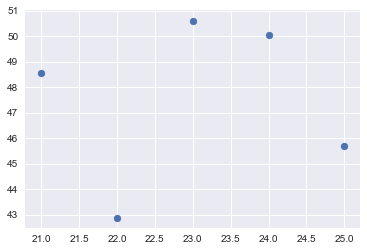

In [100]:
df_list = [expt21_df_incorr,expt22_df_incorr,expt23_df_incorr,expt24_df_incorr, expt25_df_incorr]
df_list_47 = [expt21_df_incorr,expt22_df_incorr_47,expt23_df_incorr_47,expt24_df_incorr_47, expt25_df_incorr_47]
df_name = ["21","22","23","24","25"]
df_averages=list();
df_averages47=list();


for i,expt in enumerate(df_list):
    print(df_name[i], "mean", np.average(expt[0][0]))
    df_averages.append(np.average(expt[0][0]))
for i,expt in enumerate(df_list_47):
    print(df_name[i], "mean47", np.average(expt[0][0]))
    df_averages47.append(np.average(expt[0][0]))

plt.scatter(df_name,df_averages47)
print("disparity",disparity(expt25_df_incorr_47[0][0]))

In [62]:
#For the translation of one amino acid, the incorporation time could vary via power law distribution. But, averaged across the whole chain, and
#further averaged across all ribosomes producing that protein chain, the bulk average translation time is obtained. So 17aa/s is not a per amino acid rate at all.
# Rate varies strongly across each different type of tRNA (based on abundance), and also for any given tRNA varies strongly via power law distribution. The average
# across all of one type of amino acid incorporation gives the average incorp rate of that one aa; and the average across all types of amino acids is 17aa/s;
# This model doesn't explain translational bursting; it's possible that bursting is a complete function of transcriptional burstine. Or, there could be transient
#crowded pockets that form in E. coli that allow
#How much time does it take a tRNA to reach its ribosome on average in typical biological distribution?

print("Mean: ", np.average([y for y in expt21_df_incorr[0][0] if y != 0]))
print("Median: ", np.median([y for y in expt21_df_incorr[0][0] if y != 0]))

Mean:  526.840445269
Median:  338.0


In [ ]:
fig,ax=plt.subplots(3,2,figsize=(10,10))
ax[0,0].hist(expt22_df_incorr[0],bins=10,range=(1,1000));
np.average(expt22_df_incorr[0][0])


Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)


42.885860058309035

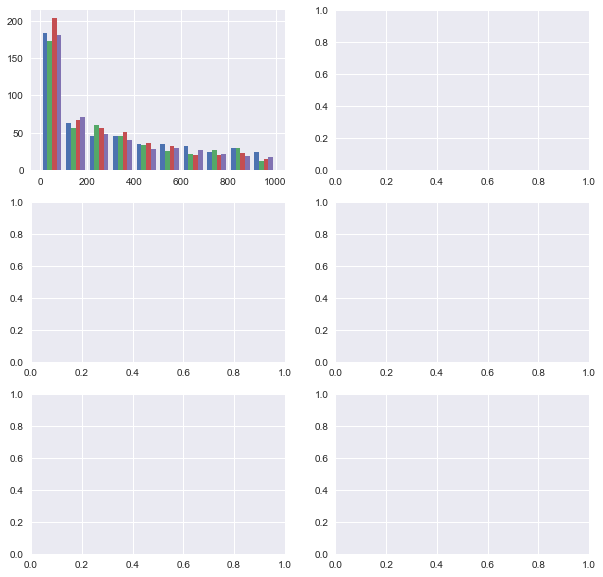

In [38]:
expt22_df=utils.readSimData("data/expt22_84tRNAEfTu_13ribosome_15tRNASynth_0aa_85nmSidelength_20180501.xls")
expt22_df_incorr = utils.countIncorrectRibosomeCollisions(expt22_df,np.arange(1,5),np.arange(85,86), tRNAInclusionList=np.arange(1,47));
fig,ax=plt.subplots(3,2,figsize=(10,10))
ax[0,0].hist(expt22_df_incorr[0],bins=10,range=(1,1000));
np.average(expt22_df_incorr[0][0])

Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)


79.830903790087461

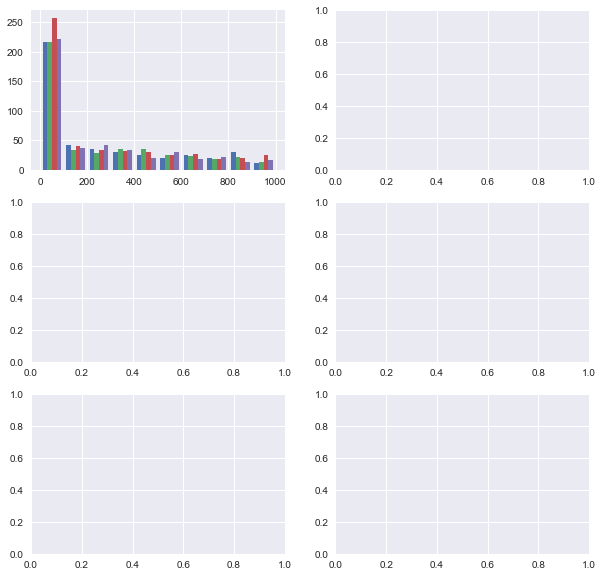

In [45]:
expt22_df=utils.readSimData("data/expt22_84tRNAEfTu_13ribosome_15tRNASynth_0aa_85nmSidelength_20180501.xls")
expt22_df_incorr = utils.countIncorrectRibosomeCollisions(expt22_df,np.arange(1,5),np.arange(85,86));
fig,ax=plt.subplots(3,2,figsize=(10,10))
ax[0,0].hist(expt22_df_incorr[0],bins=10,range=(1,1000));
np.average(expt22_df_incorr[0][0])

Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Mean:  134.469224981
Median:  0.0


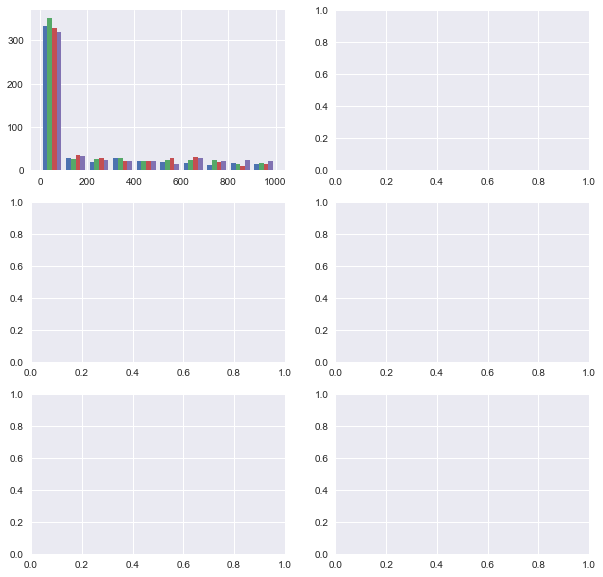

In [48]:
expt23_df=utils.readSimData("data/expt23_121tRNAEfTu_19ribosome_22tRNASynth_0aa_85nmSidelength_20180501.xls")
expt23_df_incorr = utils.countIncorrectRibosomeCollisions(expt23_df,np.arange(1,5),np.arange(122,123));
fig,ax=plt.subplots(3,2,figsize=(10,10))
ax[0,0].hist(expt23_df_incorr[0],bins=10,range=(1,1000));
print("Mean: ", np.average(expt23_df_incorr[0][0]))
print("Median: ", np.median(expt23_df_incorr[0][0]))

Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Mean:  50.6082768999
Median:  0.0


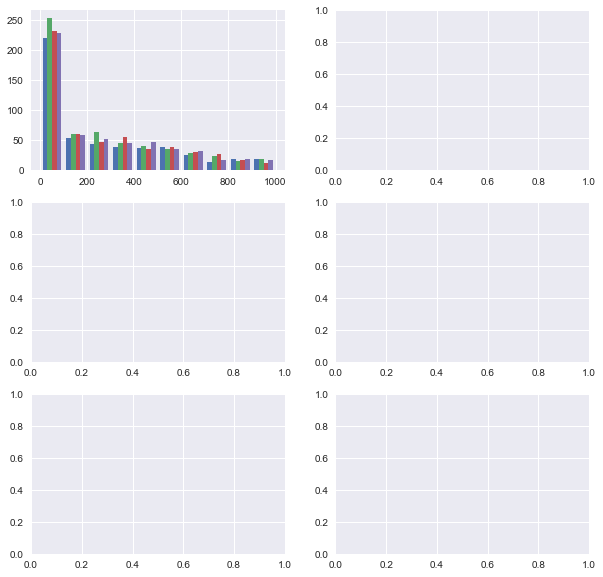

In [49]:
expt23_df=utils.readSimData("data/expt23_121tRNAEfTu_19ribosome_22tRNASynth_0aa_85nmSidelength_20180501.xls")
expt23_df_incorr = utils.countIncorrectRibosomeCollisions(expt23_df,np.arange(1,5),np.arange(122,123), tRNAInclusionList=np.arange(1,47));
fig,ax=plt.subplots(3,2,figsize=(10,10))
ax[0,0].hist(expt23_df_incorr[0],bins=10,range=(1,1000));
np.average(expt23_df_incorr[0][0])
print("Mean: ", np.average(expt23_df_incorr[0][0]))
print("Median: ", np.median(expt23_df_incorr[0][0]))

Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Mean:  50.0314347513
Median:  0.0


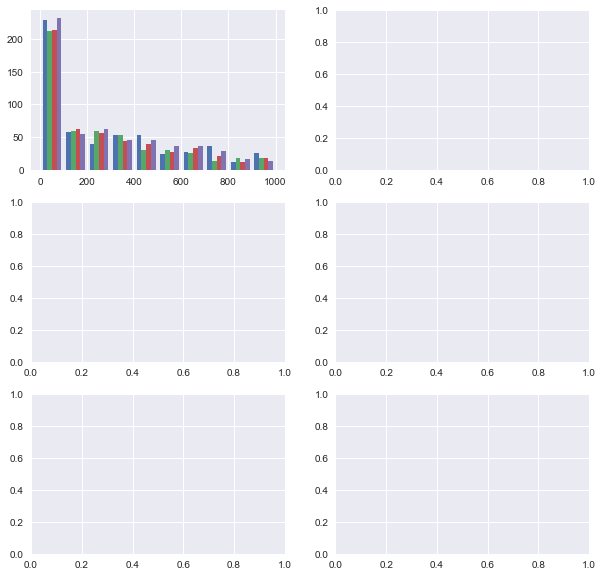

In [54]:
expt24_df=utils.readSimData("data/expt24_158tRNAEfTu_24ribosome_28tRNASynth_0aa_85nmSidelength_20180501.xls")
expt24_df_incorr = utils.countIncorrectRibosomeCollisions(expt24_df,np.arange(1,5),np.arange(159,160), tRNAInclusionList=np.arange(1,47));
fig,ax=plt.subplots(3,2,figsize=(10,10))
ax[0,0].hist(expt24_df_incorr[0],bins=10,range=(1,1000));
np.average(expt24_df_incorr[0][0])
print("Mean: ", np.average(expt24_df_incorr[0][0]))
print("Median: ", np.median(expt24_df_incorr[0][0]))

Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Mean:  45.7029090909
Median:  0.0


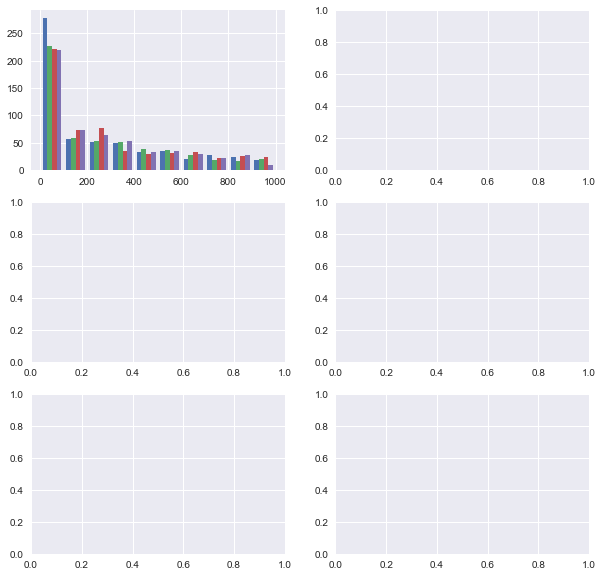

In [55]:
expt25_df=utils.readSimData("data/expt25_195tRNAEfTu_30ribosome_34tRNASynth_0aa_85nmSidelength_20180501.xls")
expt25_df_incorr = utils.countIncorrectRibosomeCollisions(expt25_df,np.arange(1,5),np.arange(196,197), tRNAInclusionList=np.arange(1,47));
fig,ax=plt.subplots(3,2,figsize=(10,10))
ax[0,0].hist(expt25_df_incorr[0],bins=10,range=(1,1000));
np.average(expt25_df_incorr[0][0])
print("Mean: ", np.average(expt25_df_incorr[0][0]))
print("Median: ", np.median(expt25_df_incorr[0][0]))

Initial ribosome x tRNA x collisionGapNumber has shape: (1, 4, 0)
Mean:  196.83369697
Median:  0.0


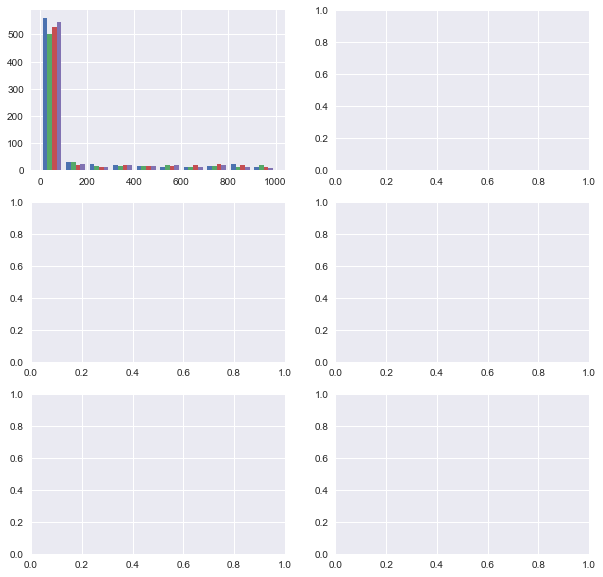

In [56]:
expt25_df=utils.readSimData("data/expt25_195tRNAEfTu_30ribosome_34tRNASynth_0aa_85nmSidelength_20180501.xls")
expt25_df_incorr = utils.countIncorrectRibosomeCollisions(expt25_df,np.arange(1,5),np.arange(196,197));
fig,ax=plt.subplots(3,2,figsize=(10,10))
ax[0,0].hist(expt25_df_incorr[0],bins=10,range=(1,1000));
np.average(expt25_df_incorr[0][0])
print("Mean: ", np.average(expt25_df_incorr[0][0]))
print("Median: ", np.median(expt25_df_incorr[0][0]))

In [61]:
print("Mean: ", np.average([y for y in expt25_df_incorr[0][0] if y != 0]))
print("Median: ", np.median([y for y in expt25_df_incorr[0][0] if y != 0]))


Mean:  1493.90800368
Median:  55.0


Analysis: 1. Full log scale x-axis plots
          2. Line graph of change in mean incorrect hits in 59ms w/ varying crowding (with standard deviation?). 

In [57]:
expt25_df_incorr[0][0]

AttributeError: 'list' object has no attribute 'nonzero'

In [99]:
def disparity(col):
    low=0
    high=0
    for i in range(len(col)):
        if col[i]<10:
            low+=1
        if col[i]>700:
            high+=1
    return low, high